In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/palmer-penguins-dataset-for-eda/penguins.csv


# **Import**

In [2]:
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

from plotly.subplots import make_subplots
import plotly.graph_objects as go

import warnings
warnings.filterwarnings("ignore")

# **1. Data Import & EDA**

In [3]:
df = pd.read_csv('/kaggle/input/palmer-penguins-dataset-for-eda/penguins.csv')

**Data Description**
>**id : Unique identifier for each penguin.**
>
>**species : Species of the penguin.**
>
>**island : Island in the Palmer Archipelago (Antarctica) where the penguin was observed.**
>
>**bill_length_mm : Length of the penguin's bill (beak) in millimeters.**
>
>**bill_depth_mm : Depth of the penguin's bill (beak) in millimeters.**
>
>**flipper_length_mm : Length of the penguin's flipper in millimeters.**
>
>**body_mass_g : Body mass of the penguin in grams.**
>
>**sex : Sex of the penguin.**
>
>**year : Year in which the observation was made.**

In [4]:
df.shape

(344, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 344 non-null    int64  
 1   species            344 non-null    object 
 2   island             344 non-null    object 
 3   bill_length_mm     342 non-null    float64
 4   bill_depth_mm      342 non-null    float64
 5   flipper_length_mm  342 non-null    float64
 6   body_mass_g        342 non-null    float64
 7   sex                333 non-null    object 
 8   year               344 non-null    int64  
dtypes: float64(4), int64(2), object(3)
memory usage: 24.3+ KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,344.0,171.500000,99.448479,0.0,85.750,171.50,257.25,343.0
bill_length_mm,342.0,43.921930,5.459584,32.1,39.225,44.45,48.50,59.6
bill_depth_mm,342.0,17.151170,1.974793,13.1,15.600,17.30,18.70,21.5
flipper_length_mm,342.0,200.915205,14.061714,172.0,190.000,197.00,213.00,231.0
body_mass_g,342.0,4201.754386,801.954536,2700.0,3550.000,4050.00,4750.00,6300.0
year,344.0,2008.029070,0.818356,2007.0,2007.000,2008.00,2009.00,2009.0


**Missing Value Check**

In [7]:
df.isnull().sum()

id                    0
species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64

**Duplicated value check**

In [8]:
df.duplicated().sum()

0

# **2. Data Transform**

In [9]:
df.dropna(axis=0,inplace=True)

In [10]:
df = df.drop(columns={'id','year'}, axis=1)

In [11]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male


# **3. Data Visualization**

In [12]:
num_cols = df.select_dtypes(include = ['int64','float64']).columns
cat_cols = df.select_dtypes(include = ['object']).columns

## **Histogram**

In [ ]:
f, ax = plt.subplots(2,2 , figsize=(10, 7))
ax = ax.flatten()

for index, cols in enumerate(num_cols):
    sns.histplot(data= df, x= cols, ax = ax[index],kde=True)
    ax[index].set_title(cols)
    
plt.tight_layout()
plt.show() 

## **Boxplot**

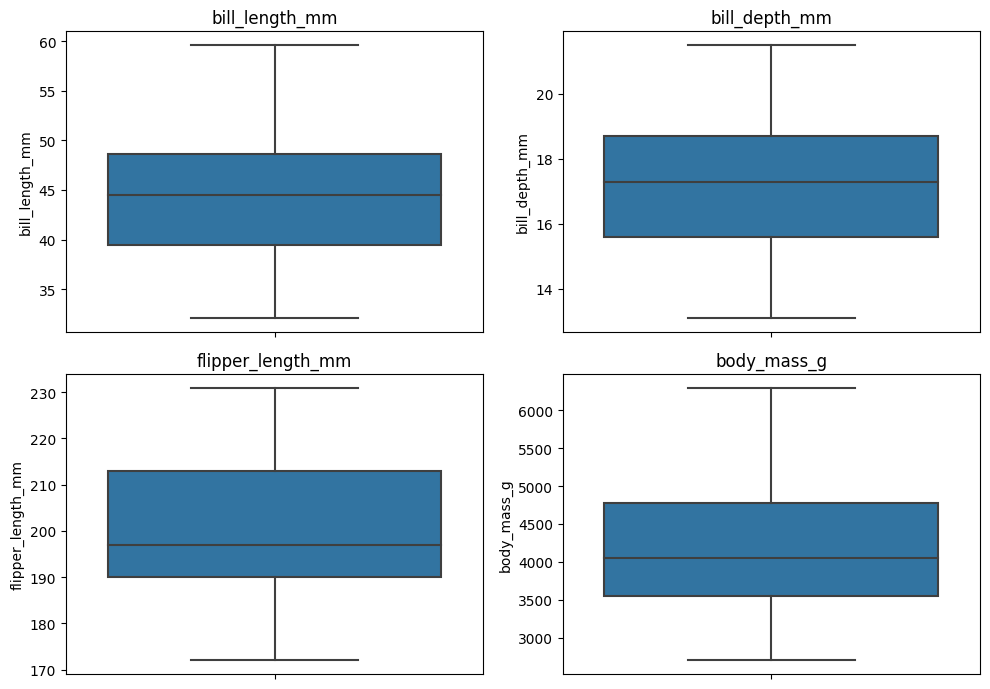

In [14]:
f, ax = plt.subplots(2,2 , figsize=(10, 7))
ax = ax.flatten()

for index, cols in enumerate(num_cols):
    sns.boxplot(data= df, y= cols, ax = ax[index])
    ax[index].set_title(cols)
    
plt.tight_layout()
plt.show() 

## **CountPlot**

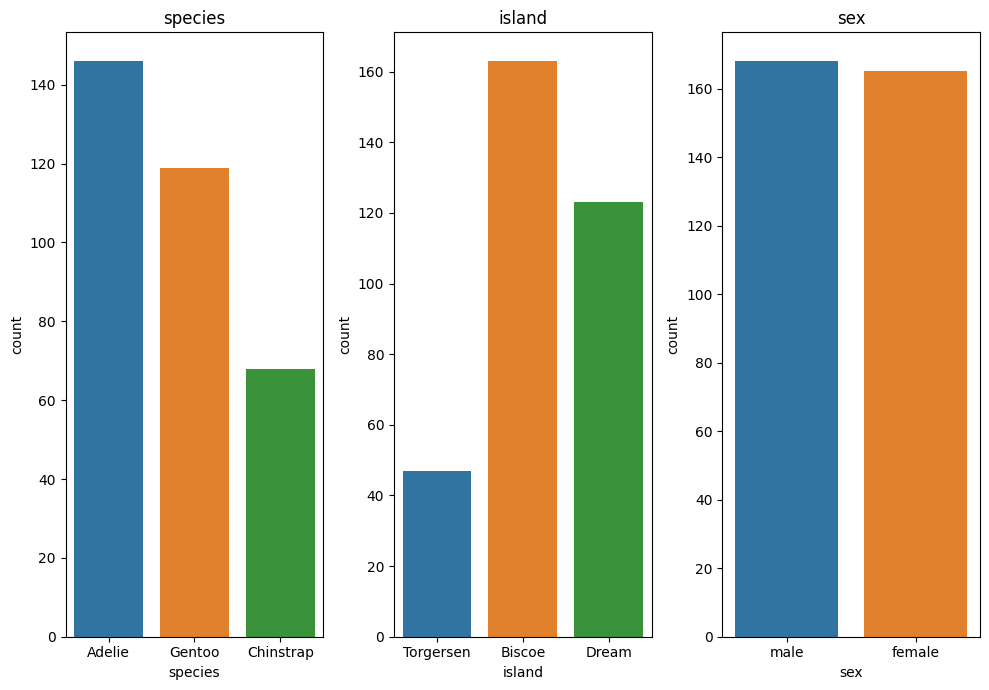

In [15]:
f, ax = plt.subplots(1,3 , figsize=(10, 7))
ax = ax.flatten()

for index, cols in enumerate(cat_cols):
    sns.countplot(data= df, x= cols, ax = ax[index])
    ax[index].set_title(cols)
    
plt.tight_layout()
plt.show() 

## **Average bill_length_mm by species**

In [16]:
species_length = df.groupby(['species'])['bill_length_mm'].mean().reset_index()

In [17]:
species_length

,species,bill_length_mm
0,Adelie,38.823973
1,Chinstrap,48.833824
2,Gentoo,47.568067


In [18]:
px.bar(species_length, x= 'species' , y = 'bill_length_mm', text_auto = True, title = 'Average bill_length_mm by species', template='plotly')

## **Average bill_depth_mm by species**

In [19]:
species_depth = df.groupby(['species'])['bill_depth_mm'].mean().reset_index()

In [20]:
species_depth

,species,bill_depth_mm
0,Adelie,18.347260
1,Chinstrap,18.420588
2,Gentoo,14.996639


In [21]:
px.bar(species_depth, x= 'species' , y = 'bill_depth_mm', text_auto = True, title = 'Average bill_depth_mm by species', template='plotly')

## **Average flipper_length_mm by species**

In [22]:
species_flipper_length = df.groupby(['species'])['flipper_length_mm'].mean().reset_index()

In [23]:
species_flipper_length

,species,flipper_length_mm
0,Adelie,190.102740
1,Chinstrap,195.823529
2,Gentoo,217.235294


In [24]:
px.bar(species_flipper_length, x= 'species' , y = 'flipper_length_mm', text_auto = True, title = 'Average flipper_length_mm by species', template='plotly')

## **Average body_mass_g by species**

In [25]:
species_body_mass = df.groupby(['species'])['body_mass_g'].mean().reset_index()

In [26]:
species_body_mass

,species,body_mass_g
0,Adelie,3706.164384
1,Chinstrap,3733.088235
2,Gentoo,5092.436975


In [27]:
px.bar(species_body_mass, x= 'species' , y = 'body_mass_g', text_auto = True, title = 'Average body_mass_g by species', template='plotly')

## **Population of Adelie penguin by island**

In [28]:
species_island = df.groupby(['species','island']).size().reset_index(name='count')

In [29]:
species_island

,species,island,count
0,Adelie,Biscoe,44
1,Adelie,Dream,55
2,Adelie,Torgersen,47
3,Chinstrap,Dream,68
4,Gentoo,Biscoe,119


**Chinstrap lives only in Dream, Gentoo only lives in Biscoe.**

In [30]:
species_island_Adelie = species_island.loc[species_island['species'] == 'Adelie',:]
species_island_Adelie

,species,island,count
0,Adelie,Biscoe,44
1,Adelie,Dream,55
2,Adelie,Torgersen,47


In [31]:
px.bar(species_island_Adelie, x= 'island' , y = 'count',text_auto = True, title = 'Population of Adelie penguin by island', template='plotly')

## **Correlation**

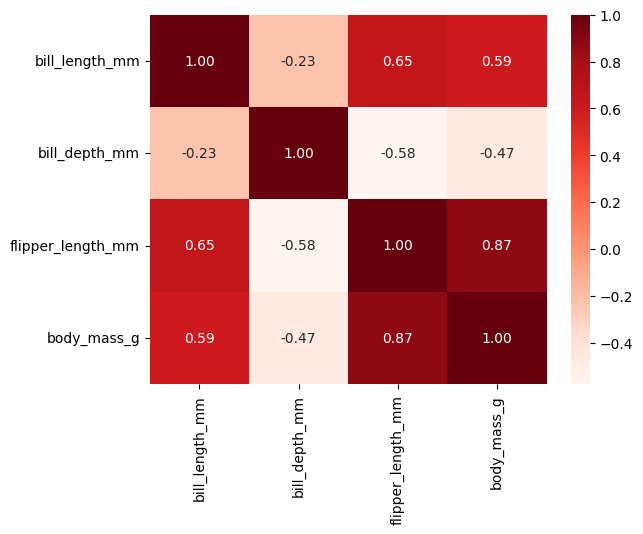

In [32]:
sns.heatmap(df[num_cols].corr(),annot=True, cmap='Reds',fmt= '.2f')
plt.show()

# **4. Modeling**

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, classification_report , confusion_matrix

## **Label Encoder**

In [34]:
cat_cols = df.select_dtypes(exclude = ['int64','float64']).columns
label_encoder = LabelEncoder()

for col in cat_cols:
    df[col] = label_encoder.fit_transform(df[col])

## **Train Test Split**

In [35]:
x = df.drop('species', axis=1)
y = df['species']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

## **RandomForest Model**

In [37]:
model_rf = RandomForestClassifier(n_estimators = 300 , random_state=42)

In [38]:
model_rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=300, random_state=42)

In [39]:
pred_rf = model_rf.predict(X_test)

In [40]:
accuracy = accuracy_score(y_test, pred_rf)

In [41]:
cm = confusion_matrix(y_test, pred_rf)

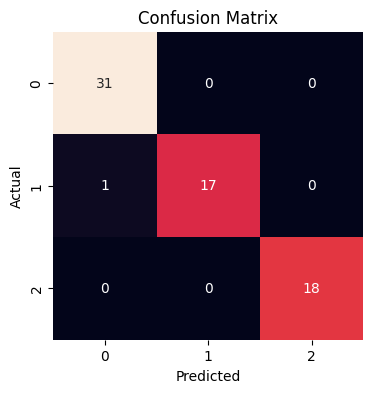

In [54]:
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt="d", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [43]:
model_rf_report = classification_report(y_test, pred_rf)

In [44]:
print(f'RandomForest Model accuracy: {round(accuracy,4)}')
print('Classification Report:')
print(f'{model_rf_report}')

RandomForest Model accuracy: 0.9851
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        31
           1       1.00      0.94      0.97        18
           2       1.00      1.00      1.00        18

    accuracy                           0.99        67
   macro avg       0.99      0.98      0.99        67
weighted avg       0.99      0.99      0.98        67



## **Parameter tune**

In [45]:
n_estimators = [100, 200, 300, 400, 500]
max_depth = [None, 10, 20, 30, 40, 50]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
max_features = ['sqrt', 'log2']
bootstrap = [True, False]

hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
    'max_features': max_features,
    'bootstrap': bootstrap
}

In [46]:
from sklearn.model_selection import RandomizedSearchCV
random_cv = RandomizedSearchCV(estimator=model_rf,
                               param_distributions=hyperparameter_grid,
                               cv=5,
                               n_iter=50,
                               scoring='accuracy',  
                               n_jobs=-1,
                               verbose=5,
                               return_train_score=True,
                               random_state=42)

In [48]:
random_cv.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV 1/5] END bootstrap=True, max_depth=40, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=400;, score=(train=1.000, test=0.981) total time=   1.3s
[CV 1/5] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400;, score=(train=1.000, test=0.963) total time=   1.0s
[CV 4/5] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400;, score=(train=1.000, test=0.962) total time=   1.0s
[CV 5/5] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200;, score=(train=0.995, test=1.000) total time=   0.5s
[CV 4/5] END bootstrap=False, max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=400;, score=(train=1.000, test=0.962) total time=   1.0s
[CV 3/5] END bootstrap=False, max_depth=50, max_features=log2,

RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(n_estimators=300,
                                                    random_state=42),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 10, 20, 30, 40, 50],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   random_state=42, return_train_score=True, scoring='accuracy',
                   verbose=5)

[CV 4/5] END bootstrap=False, max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=300;, score=(train=0.991, test=0.943) total time=   0.8s
[CV 2/5] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200;, score=(train=0.991, test=0.962) total time=   0.5s
[CV 5/5] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200;, score=(train=0.991, test=1.000) total time=   0.5s
[CV 4/5] END bootstrap=True, max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=200;, score=(train=0.991, test=0.925) total time=   0.7s
[CV 3/5] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=500;, score=(train=0.991, test=0.962) total time=   1.6s
[CV 2/5] END bootstrap=False, max_depth=50, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=200;, s

In [49]:
best_params = random_cv.best_params_
best_score = random_cv.best_score_

In [50]:
print(f'Best parameters: {best_params}')
print(f'Best score: {best_score}')

Best parameters: {'n_estimators': 400, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': False}
Best score: 0.9812718378756115


In [55]:
best_model_rf = random_cv.best_estimator_
pred_rf = best_model_rf.predict(X_test)

In [56]:
accuracy = accuracy_score(y_test, pred_rf)

In [60]:
cm = confusion_matrix(y_test, pred_rf)

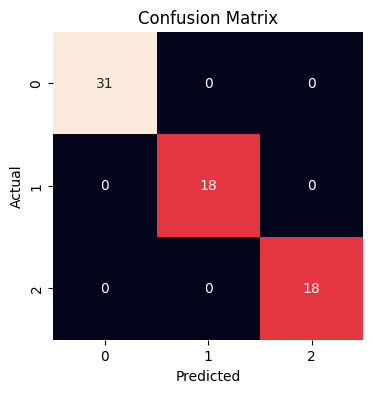

In [61]:
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt="d", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [66]:
model_rf_report = classification_report(y_test, pred_rf)

In [67]:
print(f'RandomForest Model accuracy: {round(accuracy,4)}')
print('Classification Report:')
print(f'{model_rf_report}')

RandomForest Model accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       1.00      1.00      1.00        18
           2       1.00      1.00      1.00        18

    accuracy                           1.00        67
   macro avg       1.00      1.00      1.00        67
weighted avg       1.00      1.00      1.00        67



**Thankyou. Please leave your advice in the comments.**